In [ ]:
# FINAL PROJECT - ANALYSIS OF WORLD HAPPINESS

STEPS BY STEP TO PREPARE THE MODEL

  1. COLLECT THE DATA - KAGGLE
  2. PREPROCESS THE DATA
  3. CLEAN THE DATA
  4. TRAIN THE DATA
  5. VALIDADE THE DATA
  6. TEST THE DATA
  7. DEPLOY THE MODEL

In [ ]:
# libraries that will be used

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# PREPROCESS THE DATA AND CLEANING THE DATA
happiness = pd.read_csv('/content/world_happiness_report.csv')
print("Data size:", happiness.shape)

Data size: (2199, 13)


In [ ]:
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [ ]:
happiness.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [ ]:
print("Columns name:\n", happiness.columns)

Columns name:
 Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')


In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [ ]:
print(happiness.isnull().sum())

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64


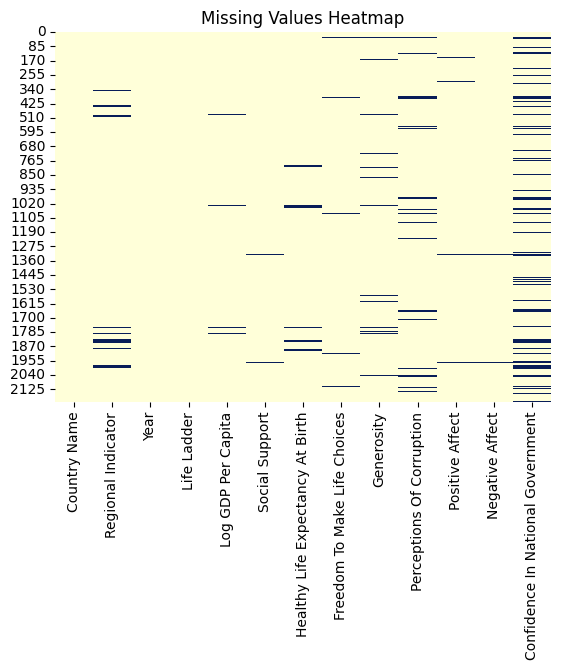

In [ ]:
# VISUALIZE WITH THE ARE MISSING ANY VALUE

sns.heatmap(happiness.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
happiness_filled = happiness.fillna(happiness.mean(numeric_only=True))

In [ ]:
print(happiness_filled.isnull().sum())

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                     0
Social Support                         0
Healthy Life Expectancy At Birth       0
Freedom To Make Life Choices           0
Generosity                             0
Perceptions Of Corruption              0
Positive Affect                        0
Negative Affect                        0
Confidence In National Government      0
dtype: int64


In [ ]:
# EVEN THOUGH WE DON'T HAVE ANY MISSING VALUE I WILL DROP THE COUNTRY COLUMN BECAUSE IT IS CATEGORICAL AND WON'T BE USED FOR NOW

happiness_cleaned = happiness_filled.drop(['Country Name', 'Regional Indicator', 'Year'], axis=1)

In [ ]:
happiness_cleaned.shape

(2199, 10)

In [ ]:
# CLUSTERING (UNSUPERVISED LEARNING)

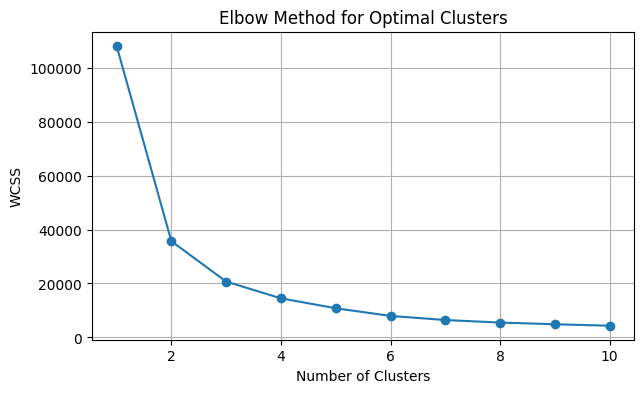

In [ ]:
wcss = [] # within-cluster sum of square

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=52)
  kmeans.fit(happiness_cleaned)
  wcss.append(kmeans.inertia_)

# Plot the Graph
plt.figure(figsize=(7,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Elbow Method used to find the optimal number of clusters.
# WCSS drops sharply until k=3, then flattens — forming an "elbow."
# This suggests that 3 clusters offer a good balance between accuracy and simplicity.

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 52)
cluster_labels = kmeans.fit_predict(happiness_cleaned)

happiness['cluster'] = cluster_labels # Add the cluster labels back to the original dataframe

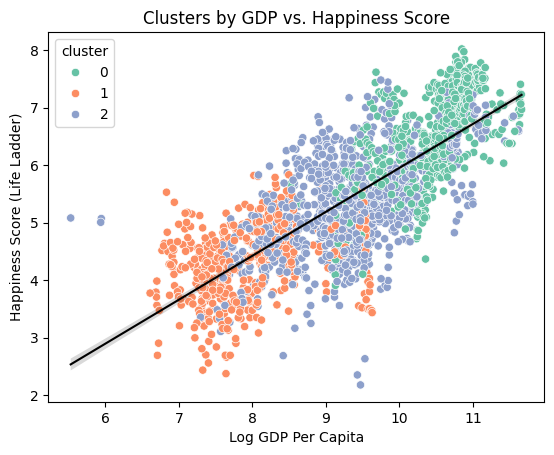

In [ ]:
# VISUALIZE CLUSTERS

sns.scatterplot(data = happiness, x = "Log GDP Per Capita", y = "Life Ladder", hue = "cluster", palette = "Set2")
sns.regplot(data = happiness, x = "Log GDP Per Capita", y = "Life Ladder", scatter = False, color = "black", line_kws={"linewidth":1.5})
plt.title("Clusters by GDP vs. Happiness Score")
plt.xlabel("Log GDP Per Capita")
plt.ylabel("Happiness Score (Life Ladder)")
plt.show()

In [ ]:
# This scatterplot shows a strong, positive relationship between GDP per capita and happiness score.
# Countries are grouped into three clusters that likely reflect low, medium, and high levels of development and well-being.
# The regression line confirms the upward trend: higher GDP per capita is generally associated with higher happiness.
# Most countries follow this trend closely, though a few outliers remain.

In [ ]:
# CUSTOM LABEL FOR CLASSIFICATION (SUPERVISED LEARNING)

In [ ]:
# Define label based on GDP per capita
def classify_happiness(score):
  if score <= 4:
    return "Low"
  elif score <= 6:
    return "Medium"
  else:
    return "High"

happiness["happiness_class"] = happiness["Life Ladder"].apply(classify_happiness) # Create a new column

In [ ]:
# Features and target - Prepare Data for Modelling

x = happiness.drop(['Country Name', 'Life Ladder', 'Regional Indicator', 'Year', 'cluster', 'happiness_class'], axis=1)
y = happiness['happiness_class']

In [ ]:
# Split Dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 52)

In [ ]:
# TRAIN MODELS

In [ ]:
# 1. DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

new_analyse = ["Healthy Life Expectancy At Birth", "Log GDP Per Capita"]
x_new = happiness[new_analyse]
y_new = happiness['happiness_class']

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 52)
dt = DecisionTreeClassifier(random_state=52)
dt.fit(x_new_train, y_new_train)
y_pred_dt = dt.predict(x_new_test)

print("Acurracy:", accuracy_score(y_new_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_new_test, y_pred_dt))

Acurracy: 0.7136363636363636

Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.72      0.73       155
         Low       0.42      0.37      0.39        41
      Medium       0.74      0.77      0.75       244

    accuracy                           0.71       440
   macro avg       0.63      0.62      0.62       440
weighted avg       0.71      0.71      0.71       440



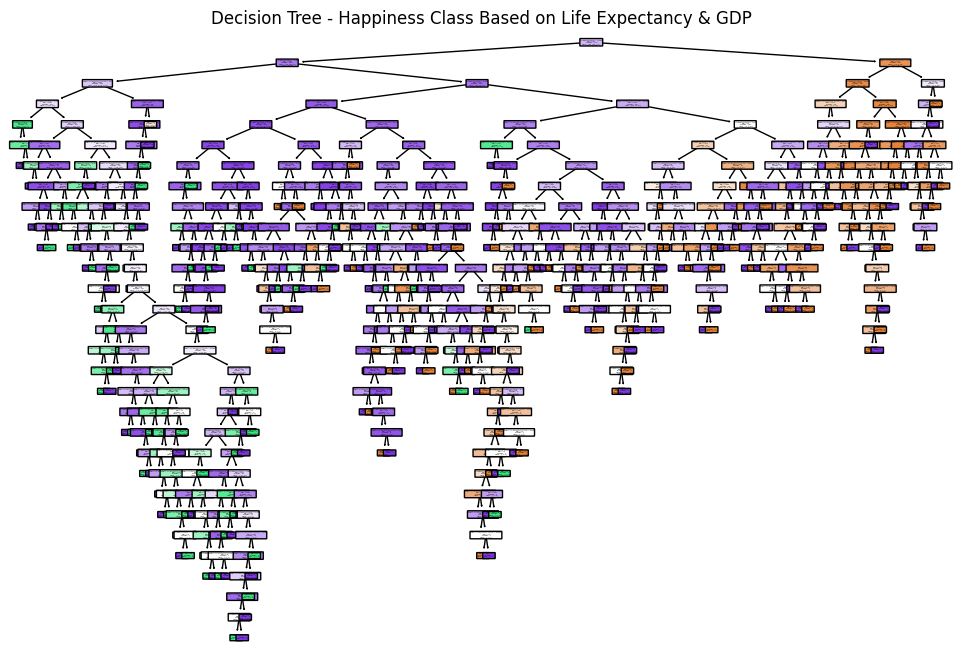

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=new_analyse, class_names=dt.classes_, filled = True, rounded = True)
plt.title("Decision Tree - Happiness Class Based on Life Expectancy & GDP")
plt.show()

In [ ]:
# This decision tree visualizes how countries are classified into happiness categories (Low, Medium, High)
# based on just two features: healthy life expectancy and GDP per capita (log scale).
# The model reveals that higher GDP and longer healthy life expectancy are strong indicators of higher happiness scores.
# The depth and complexity of the tree indicate nuanced decision boundaries, especially in mid-range values.
# This helps identify patterns across countries with similar economic and health conditions.

<ipython-input-75-460580638>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", palette = "viridis", data = data_df1)


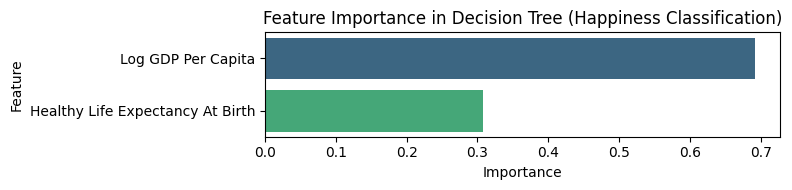

In [ ]:
importances = dt.feature_importances_
feat_names = new_analyse

data_df1 = pd.DataFrame({"Importance": importances, "Feature": feat_names}) # create a DataFrame for better sorting and visualization
data_df1 = data_df1.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 2))
sns.barplot(x = "Importance", y = "Feature", palette = "viridis", data = data_df1)
plt.title("Feature Importance in Decision Tree (Happiness Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# 2. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=52)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.865909090909091

Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.85      0.89       155
         Low       0.81      0.41      0.55        41
      Medium       0.83      0.95      0.89       244

    accuracy                           0.87       440
   macro avg       0.86      0.74      0.78       440
weighted avg       0.87      0.87      0.86       440



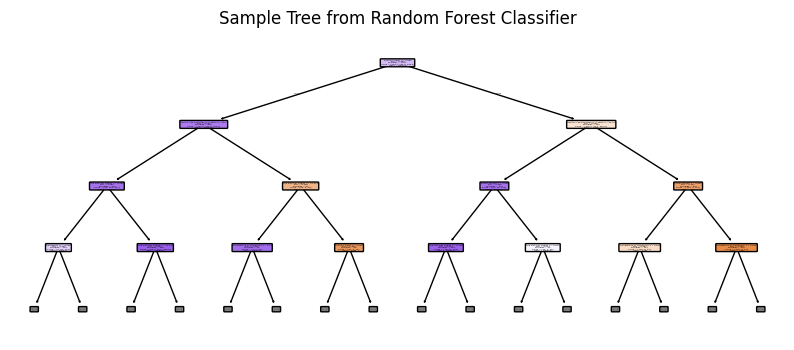

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,4))
plot_tree(rf.estimators_[0], feature_names = x.columns, class_names = rf.classes_,
          filled = True, rounded = True, max_depth = 3)
plt.title("Sample Tree from Random Forest Classifier")
plt.show()

In [ ]:
# This visualization shows how a single decision tree within the Random Forest makes predictions about happiness categories.
# While the overall model is an ensemble of many trees, this sample tree illustrates how specific features like GDP per capita and healthy life expectancy contribute to the decision-making process.
# It helps explain how the model separates countries into Low, Medium, and High happiness classes based on combinations of these key indicators.

<ipython-input-80-2310667579>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", palette = "viridis", data = data_df)


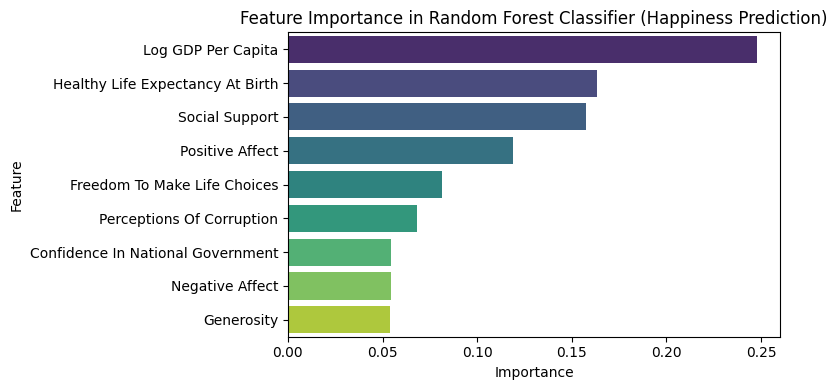

In [ ]:
importances = rf.feature_importances_
feat_names = x.columns

data_df = pd.DataFrame({"Importance": importances, "Feature": feat_names}) # create a DataFrame for better sorting and visualization
data_df = data_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x = "Importance", y = "Feature", palette = "viridis", data = data_df)
plt.title("Feature Importance in Random Forest Classifier (Happiness Prediction)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Conclusion:
# The analysis shows a strong correlation between GDP per capita, life expectancy, and happiness levels across countries.
# Both decision tree and random forest models effectively classified happiness categories, highlighting economic and health factors as key predictors.